In [3]:
%matplotlib inline

from scipy.stats import norm
from math import sqrt
from random import sample 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn import preprocessing

#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.figure_factory as ff
#from plotly import tools
#import plotly.plotly as py

df = pd.read_csv("2016-School-Explorer.csv")

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
df.columns

Index(['Adjusted Grade', 'New?', 'Other Location Code in LCGMS', 'School Name',
       'SED Code', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)',
       ...
       'Grade 8 Math - All Students Tested', 'Grade 8 Math 4s - All Students',
       'Grade 8 Math 4s - American Indian or Alaska Native',
       'Grade 8 Math 4s - Black or African American',
       'Grade 8 Math 4s - Hispanic or Latino',
       'Grade 8 Math 4s - Asian or Pacific Islander',
       'Grade 8 Math 4s - White', 'Grade 8 Math 4s - Multiracial',
       'Grade 8 Math 4s - Limited English Proficient',
       'Grade 8 Math 4s - Economically Disadvantaged'],
      dtype='object', length=161)

In [6]:
df.drop(['Adjusted Grade', 'New?', 'Other Location Code in LCGMS','SED Code'],axis=1)
#irrelevant columns

,School Name,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,P.S. 015 ROBERTO CLEMENTE,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",PK,...,0,0,0,0,0,0,0,0,0,0
1,P.S. 019 ASHER LEVY,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",NEW YORK,10003,"PK,0K,01,02,03,04,05",PK,...,0,0,0,0,0,0,0,0,0,0
2,P.S. 020 ANNA SILVER,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",NEW YORK,10002,"PK,0K,01,02,03,04,05",PK,...,0,0,0,0,0,0,0,0,0,0
3,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05,06,07,08",PK,...,48,1,0,0,0,0,0,0,0,0
4,THE STAR ACADEMY - P.S.63,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",PK,...,0,0,0,0,0,0,0,0,0,0
5,P.S. 064 ROBERT SIMON,01M064,1,40.723747,-73.981602,"600 E 6TH ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",PK,...,0,0,0,0,0,0,0,0,0,0
6,P.S. 110 FLORENCE NIGHTINGALE,01M110,1,40.715293,-73.979927,"285 DELANCEY ST NEW YORK, NY 10002",NEW YORK,10002,"PK,0K,01,02,03,04,05",PK,...,0,0,0,0,0,0,0,0,0,0
7,P.S. 134 HENRIETTA SZOLD,01M134,1,40.714301,-73.982966,"293 E BROADWAY NEW YORK, NY 10002",NEW YORK,10002,"PK,0K,01,02,03,04,05",PK,...,0,0,0,0,0,0,0,0,0,0
8,P.S. 140 NATHAN STRAUS,01M140,1,40.719128,-73.983283,"123 RIDGE ST NEW YORK, NY 10002",NEW YORK,10002,"PK,0K,01,02,03,04,05,06,07,08",PK,...,61,2,0,0,1,0,0,0,0,1
9,P.S. 142 AMALIA CASTRO,01M142,1,40.718230,-73.984082,"100 ATTORNEY ST NEW YORK, NY 10002",NEW YORK,10002,"PK,0K,01,02,03,04,05",PK,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#cleaning
#filling caregorical data using ffil 
l= ['Rigorous Instruction Rating','Collaborative Teachers Rating','Supportive Environment Rating','Effective School Leadership Rating','Strong Family-Community Ties Rating','Trust Rating','Student Achievement Rating']
for i in l:
    df[i].fillna(method = 'ffill')

In [8]:
# Preprocess some data
# Create a function to convert the percentage to a fraction 
def p2f(x):
    return float(x.strip('%'))/100

df['Percent of Students Chronically Absent']=df['Percent of Students Chronically Absent'].astype(str).apply(p2f)
df['Rigorous Instruction %'] = df['Rigorous Instruction %'].astype(str).apply(p2f)
df['Collaborative Teachers %'] = df['Collaborative Teachers %'].astype(str).apply(p2f)
df['Supportive Environment %'] = df['Supportive Environment %'].astype(str).apply(p2f)
df['Effective School Leadership %'] = df['Effective School Leadership %'].astype(str).apply(p2f)
df['Strong Family-Community Ties %'] = df['Strong Family-Community Ties %'].astype(str).apply(p2f)
df['Trust %'] = df['Trust %'].astype(str).apply(p2f)
df['Student Attendance Rate'] = df['Student Attendance Rate'].astype(str).apply(p2f)

df['Percent Asian'] = df['Percent Asian'].apply(p2f)
df['Percent Black'] = df['Percent Black'].apply(p2f)
df['Percent Hispanic'] = df['Percent Hispanic'].apply(p2f)
df['Percent White'] = df['Percent White'].apply(p2f)
df['Percent Black / Hispanic'] = df['Percent Black / Hispanic'].apply(p2f)

In [9]:
df['School Income Estimate'] = df['School Income Estimate'].str.replace(',', '')
df['School Income Estimate'] = df['School Income Estimate'].str.replace('$', '')
df['School Income Estimate'] = df['School Income Estimate'].str.replace(' ', '')
df['School Income Estimate'] = df['School Income Estimate'].astype(float)

In [10]:
#filling the numerical columns with mean of the columns
df['School Income Estimate'] = df['School Income Estimate'].fillna(np.mean(df['School Income Estimate']))
df['Economic Need Index'] = df['Economic Need Index'].fillna(np.mean(df['Economic Need Index']))

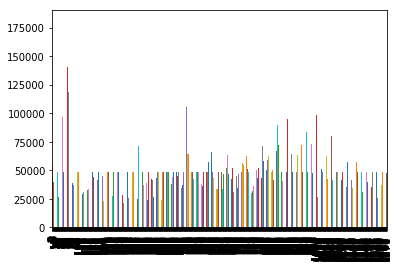

In [11]:
df['School Income Estimate'].plot.bar()


The values with same income estimate along a horizontal line are the ones that are replaced with the mean

In the graph below we see that the distribution for Grade High is right skewed.

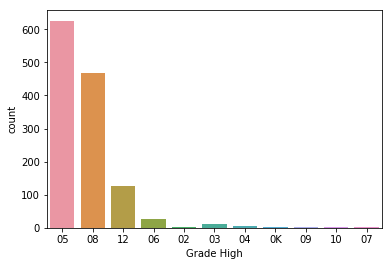

In [12]:
sns.countplot(df['Grade High'])

In [13]:
#2. Normalization and Standardization: 
#To be done later
#df11 = df['School Income Estimate'] = (df['School Income Estimate'] - np.mean(df['School Income Estimate']))/np.std(df['School Income Estimate'])
#df22 = df['Economic Need Index'] = (df['Economic Need Index'] - np.mean(df['Economic Need Index']))/np.std(df['Economic Need Index'])
#df33 = df['Economic Need Index'] = (df['Economic Need Index'] - np.mean(df['Economic Need Index']))/np.std(df['Economic Need Index'])
#x_array = np.array(df33)
#df33 = preprocessing.normalize([x_array])
#df33 = normalized_X

The following graph we can see the distribution of Economic Need Index
Here we can see that the graph for Economic need index is left skewed

C:\Users\saiea\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


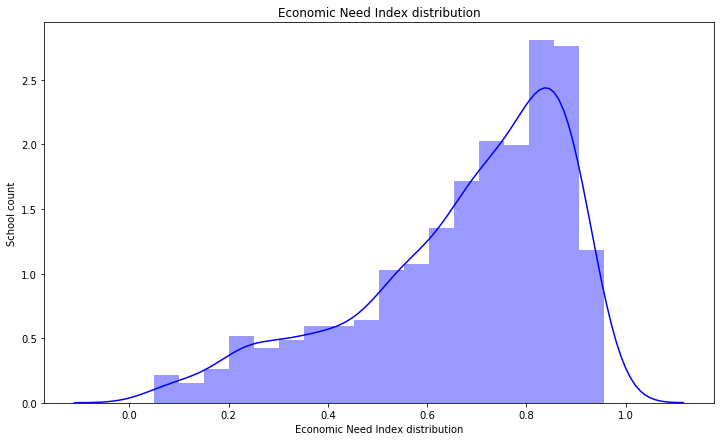

In [14]:
plt.figure(figsize=(12,7))
temp = sns.distplot(df[['Economic Need Index']].values, kde=True,color = 'b')
temp= plt.title("Economic Need Index distribution")
temp = plt.xlabel("Economic Need Index distribution")
temp = plt.ylabel("School count")

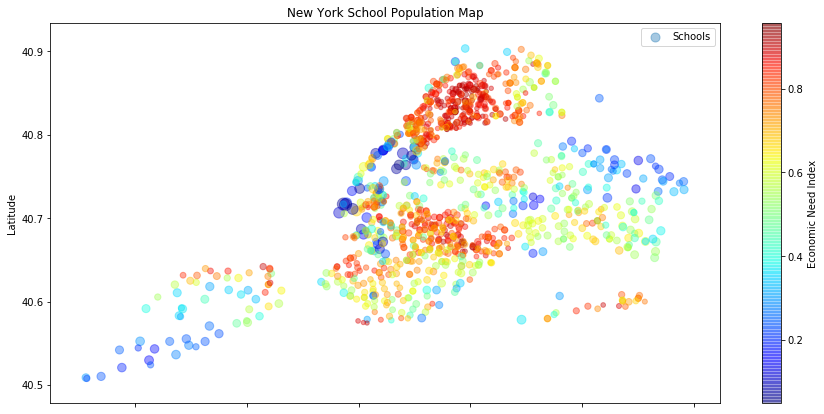

In [15]:
df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=df['School Income Estimate']/1210, c="Economic Need Index", cmap=plt.get_cmap("jet"),
        label='Schools', title='New York School Population Map',colorbar=True, alpha=0.4, figsize=(15,7))
#plt.xlabel("Longitude")
plt.legend()
plt.show()

We can see that the school when ploted according to the location from latitude and longitude , the schools with higher economic needs are found in the regions of Central New York according to the School Income Estimate.

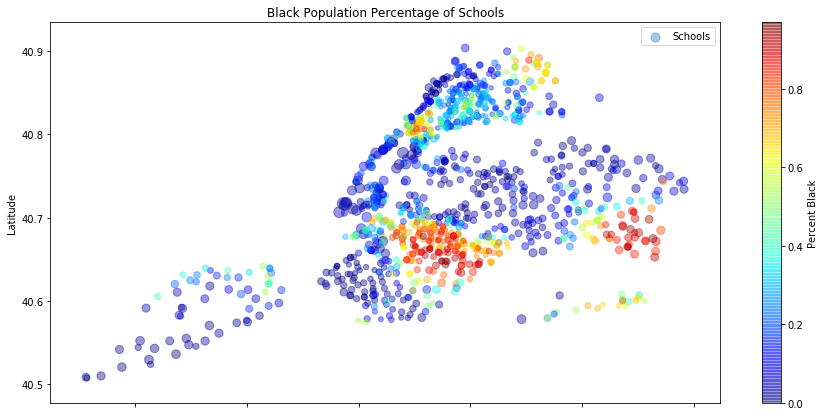

In [16]:
df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=df['School Income Estimate']/1210, c="Percent Black", cmap=plt.get_cmap("jet"),
        label='Schools', title='Black Population Percentage of Schools',colorbar=True, alpha=0.4, figsize=(15,7))
#plt.xlabel("Longitude")
plt.legend()
plt.show()

Central New York contains most of the Schools with Blacks:
1) As we can see here that the 
Majority of the black population are living in Central New York  . 
2)If you compare this to the Hispanic Population, they are totally isolated from each other.(Red) 

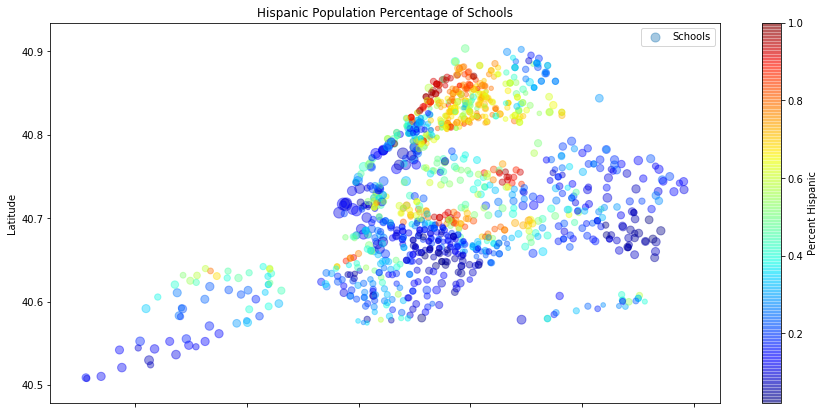

In [17]:
df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=df['School Income Estimate']/1210, c="Percent Hispanic", cmap=plt.get_cmap("jet"),
        label='Schools', title='Hispanic Population Percentage of Schools',colorbar=True, alpha=0.4, figsize=(15,7))
#plt.xlabel("Longitude")
plt.legend()
plt.show()

Majority of the hispanic population are living in Upper New York. Here we notice that there are a few Hispanics in Central New York while there are a majority of Blacks in Central New York.

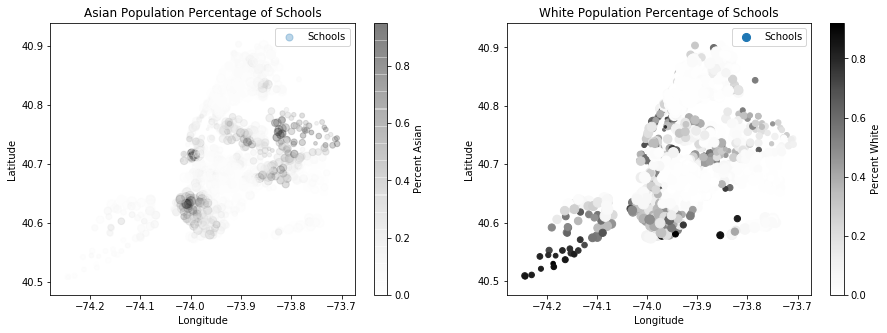

In [18]:
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[0],
    s=df['Economic Need Index']*100, c="Percent Asian", label='Schools', title='Asian Population Percentage of Schools',
    colorbar=True, alpha=0.3, figsize=(15,5))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[1],
    s=df['Economic Need Index']*130, c="Percent White", label='Schools', title='White Population Percentage of Schools',
    colorbar=True, alpha=1, figsize=(15,5))

plt.legend()
plt.show()

The Asian population are mostly living in Central New York.Noticeable from the black color.

The White Population has a very noticeable cluster near the edge and lower parts of New York.

In [19]:
df.columns[58]

'Grade 3 Math 4s - Multiracial'

In [20]:
lb = [np.mean(df['Grade 3 Math 4s - American Indian or Alaska Native']),np.mean(df['Grade 3 Math 4s - American Indian or Alaska Native']),np.mean(df['Grade 3 Math 4s - Hispanic or Latino']),np.mean(df['Grade 3 Math 4s - Asian or Pacific Islander']),np.mean(df['Grade 3 Math 4s - White']),np.mean(df['Grade 3 Math 4s - Multiracial'
])]

In [21]:
np.mean(df['Grade 3 Math 4s - American Indian or Alaska Native'])

0.027515723270440252

Now we see the percent distribution of the Different Races

C:\Users\saiea\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\saiea\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\saiea\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\saiea\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(564.67,0.5,'Count')

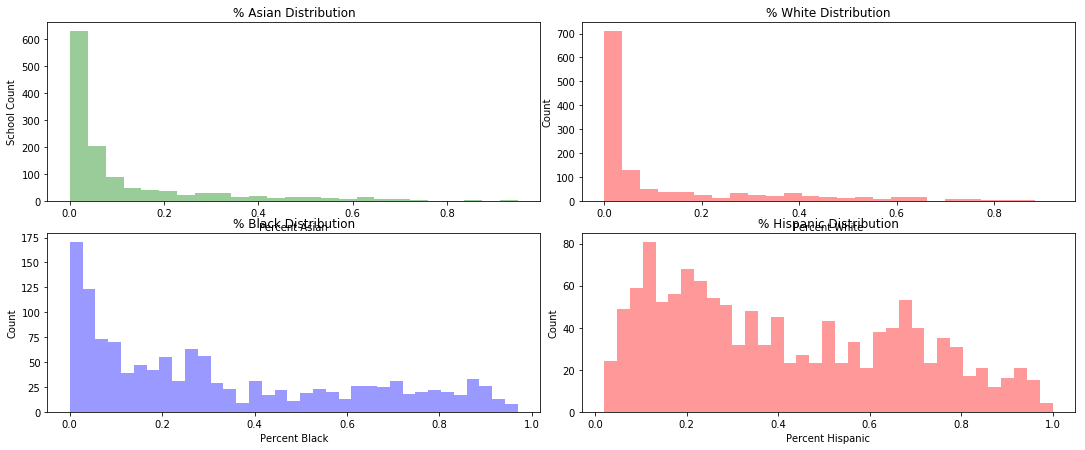

In [48]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(15, 6))
plt.tight_layout()

sns.distplot(df['Percent Asian'], kde=False, color="g", ax=axes[0][0], bins=25)
axes[0][0].set_title('% Asian Distribution')
axes[0][0].set_ylabel('School Count')


sns.distplot(df['Percent White'], kde=False, color="r", ax=axes[0][1], bins=25).set_title('% White Distribution')
axes[0][1].set_ylabel('Count')
print("\n")
#f, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.distplot(df['Percent Black'], kde=False, color="b", ax=axes[1][0], bins=35).set_title('% Black Distribution')
axes[1][0].set_ylabel('Count')
sns.distplot(df['Percent Hispanic'], kde=False, color="r", ax=axes[1][1], bins=35).set_title('% Hispanic Distribution')
axes[1][1].set_ylabel('Count')

We can see that the population is as follows :
1.Hispanic
2.Black
3.Asian 
4.White
 
Also we can see that majority of Whites and Asians are representing approximately 10% of the school's population

In [23]:
NYC_Asians=[(df.City=="NEW YORK")& (df["Community School?"]=="Yes")]
#print(NYC_Asians["Percent Asian"])
NYC_Asians[0][5]

False

Now for Hypothesis testing

In [24]:
White_and_Asian = []
Black_and_Hispanic = []
for i in range(len(df['Percent Asian'])):#len(df['Percent Asian'])
    if((df['Percent Asian'][i]+df['Percent White'][i]) > (df['Percent Black'][i]+df['Percent Hispanic'][i])):
        White_and_Asian.append(i)
    else:
        Black_and_Hispanic.append(i)


In [25]:
w_a_eni = []
b_h_eni = []
for i in White_and_Asian:
    w_a_eni.append(df['Economic Need Index'][i])
for i in Black_and_Hispanic:
    b_h_eni.append(df['Economic Need Index'][i])

w1 = w_a_eni

w10 = sample(w1,100) 
w2 = b_h_eni
w20 = sample(w2,300)
#from sklearn import preprocessing
#preprocessing.normalize(w1)


In [26]:
#w1 = (w1 - np.mean(w1))/np.std(w1)
#w2 = (w2 - np.mean(w2))/np.std(w2)
mean_white_asian_Economic_Need_Index = np.mean(w10)#mean and standard deviation of White and Asian dominating schools
std_white_asian_Economic_Need_Index = np.std(w10)
m1 = mean_white_asian_Economic_Need_Index
s1 = std_white_asian_Economic_Need_Index
n1 = 100
mean_black_and_hispanic_Economic_Need_Index = np.mean(w20)#mean and standard deviation of Black and Hispanic dominating schools
std_black_and_hispanic_Economic_Need_Index = np.std(w20)
m2 = mean_black_and_hispanic_Economic_Need_Index
s2 = std_black_and_hispanic_Economic_Need_Index
n2 = 300


NULL Hypothesis :Schools with a Higher Hispanic and Black Population tend to have a Higher Economic Need Index Score than schools with a Higher White and Asian
Alternate Hypothesis:Schools with a Higher Hispanic and Black Population tend to have a lower Economic Need Index Score than schools with a Higher White and Asian 
    
in other words
NULL Hypothesis:mean_black_and_hispanic_Economic_Need_Index <= mean_white_asian_Economic_Need_Index
                m2 - m1 <= 0 
Alternate Hypothesis:mean_black_and_hispanic_Economic_Need_Index > mean_white_asian_Economic_Need_Index
                m2 -m1 > 0
                


Now computing the Z score:
z = (m2-m1)- 0/math.sqrt(s1^2/n1 + s2^2/n2)
    
        

In [27]:
z = (m2-m1)/(sqrt(s1**2/n1 + s2**2/n2))
z

14.544260765453194

Since the value P(z>13.4) ~= 0 
P < 0.05
We can reject the NULL Hypothesis

We have graphical Evidence to justify the Hypothesis testing .sns.replot is used to  visualize a linear relationship as determined through regression.The function draws a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

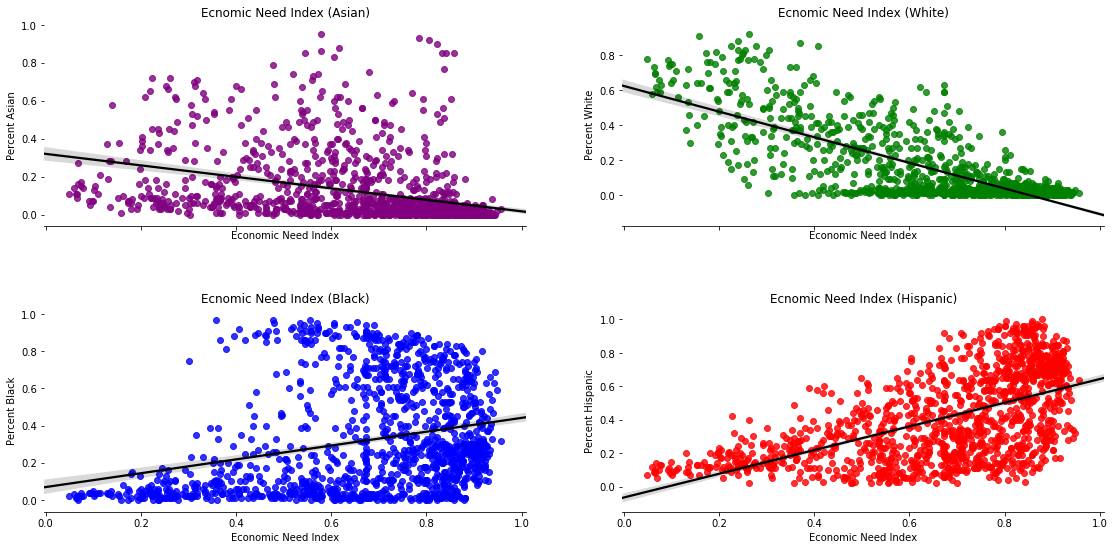

In [28]:
f, axes = plt.subplots(2, 2, figsize=(19, 9), sharex=True)
sns.despine(left=True)

sns.regplot(x=df["Economic Need Index"], y=df["Percent Asian"], color='purple', ax=axes[0, 0], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent White"], color='g', ax=axes[0, 1], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent Black"], color='b', ax=axes[1, 0], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent Hispanic"], color='r', ax=axes[1, 1], line_kws={"color": "black"})

axes[0,0].set_title('Ecnomic Need Index (Asian)')
axes[0,1].set_title('Ecnomic Need Index (White)')
axes[1,0].set_title('Ecnomic Need Index (Black)')
axes[1,1].set_title('Ecnomic Need Index (Hispanic)')

plt.subplots_adjust(hspace=0.4)


 Schools with a Higher White and Asian** Population tend to have a Lower Economic Need Index Score.
 Schools with a Higher Hispanic and Black Population tend to have a Higher Economic Need Index Score.

In [29]:
# Create a dataframe of schools with an absent rate of 30% or more.
absent_30 = df[df['Percent of Students Chronically Absent']>=.30]

# Create a dataframe of schools with an absent rate of 11% or less.
absent_11 = df[df['Percent of Students Chronically Absent']<=.11]

# Exploring School Absent Rate 
df['Percent of Students Chronically Absent'].describe()

count    1247.000000
mean        0.215750
std         0.140716
min         0.000000
25%         0.110000
50%         0.200000
75%         0.300000
max         1.000000
Name: Percent of Students Chronically Absent, dtype: float64

Studying the maths and ELA scores relation with race

In [30]:
# Display the Mean ELA and Math Scores for Black/Hispanic Dominant Schools
df[df['Percent Black / Hispanic'] >= .70][['Average ELA Proficiency','Average Math Proficiency']].mean()


Average ELA Proficiency     2.352136
Average Math Proficiency    2.439736
dtype: float64

In [31]:
# Display the Mean ELA and Math Scores for White/Asian Dominant Schools
df[df['Percent Black / Hispanic'] <= .30][['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA Proficiency     3.046919
Average Math Proficiency    3.326919
dtype: float64

C:\Users\saiea\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\saiea\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0,0.5,'Frequency')

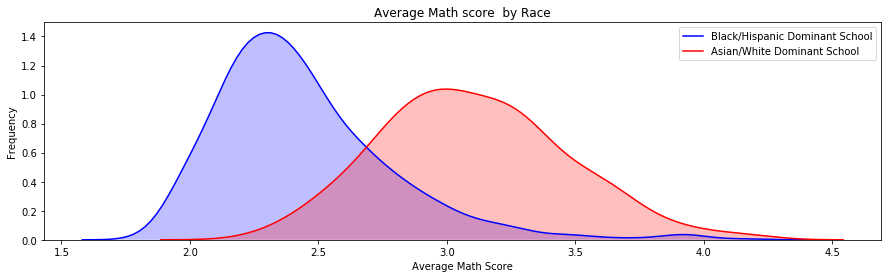

In [32]:
df['Black_Hispanic_Dominant'] = df['Percent Black / Hispanic'] >= .70


fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == True),'Average Math Proficiency'] , color='b',shade=True, label='Black/Hispanic Dominant School')
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == False),'Average Math Proficiency'] , color='r',shade=True, label='Asian/White Dominant School')
plt.title('Average Math score  by Race')
plt.xlabel('Average Math Score')
plt.ylabel('Frequency')

C:\Users\saiea\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\saiea\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0,0.5,'Frequency')

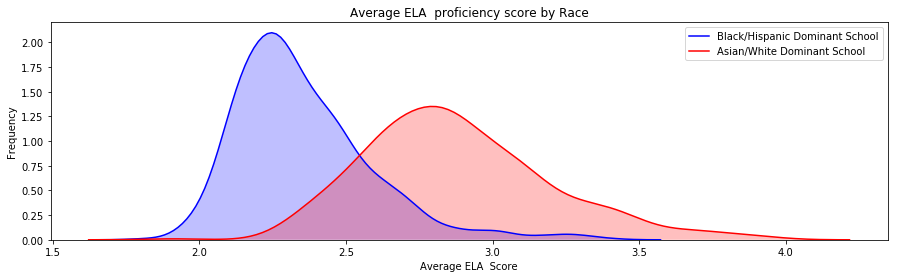

In [49]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == True),'Average ELA Proficiency'] , color='b',shade=True, label='Black/Hispanic Dominant School')
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == False),'Average ELA Proficiency'] , color='r',shade=True, label='Asian/White Dominant School')
plt.title('Average ELA  proficiency score by Race')
plt.xlabel('Average ELA  Score')
plt.ylabel('Frequency')

We can infer the following:
Black and Hispanic dominant schools have an Average ELA Score of 2.35
Black and Hispanic dominant schools have an Average Math Score of 2.44


White and Asian dominant schools have an Average ELA Score of  3.04
White and Asian dominant schools have an Average Math Score of 3.32

School Income comparison between community and non-community

Text(0.5,1,'Community School VS Not Community School Income')

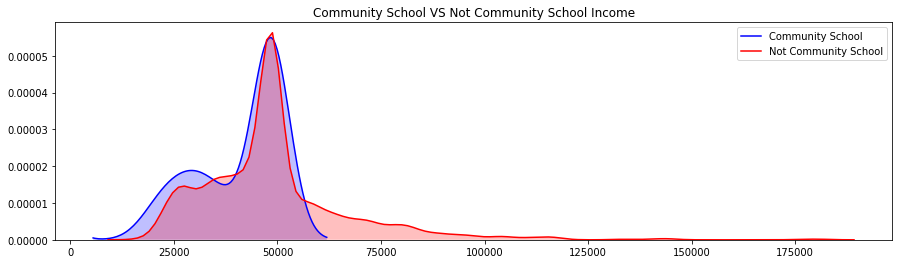

In [34]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Community School?'] == 'Yes'),'School Income Estimate'] , color='b',shade=True, label='Community School')
ax=sns.kdeplot(df.loc[(df['Community School?'] == 'No'),'School Income Estimate'] , color='r',shade=True, label='Not Community School')
plt.title('Community School VS Not Community School Income')

Here we can see that a greater proportion of the community schools have a greater Income Estimate than non Community schools.
Also here non community schools are more in number.

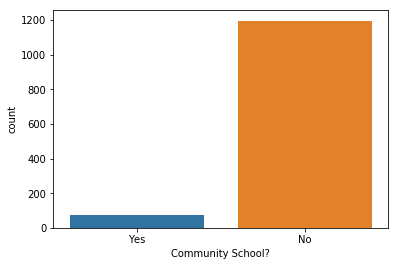

In [35]:
sns.countplot(df["Community School?"])

As we can see that there are more number of Non Community schoools.Also community schools have greater income estimate.

Now Comparing the scores for ELA and MAth proficiency among the various schools

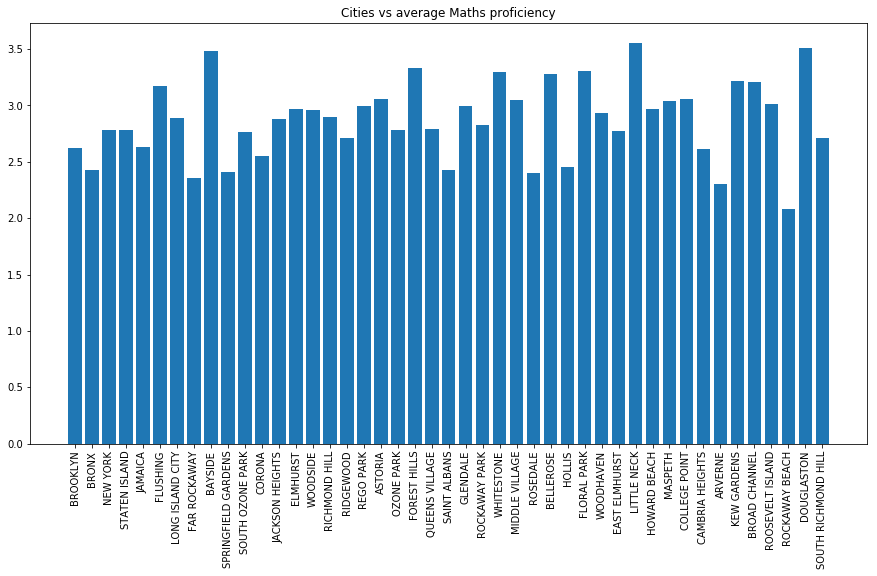

In [36]:
y=[]
city_list = list(df["City"].value_counts().index)
#print(city_list)
for i in city_list:
    y.append(df["Average Math Proficiency"][df["City"] == i].mean())
dframe=[('City',city_list),('Average ELA Score',y)]
fig = plt.figure(figsize=(15,8))
#ax.set_xlabel('cities')
#ax.set_title('cities vs average ELA proficiency')
plt.title("Cities vs average Maths proficiency")
plt.bar(dframe[0][1],dframe[1][1],width=0.8)
plt.xticks( dframe[0][1], rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

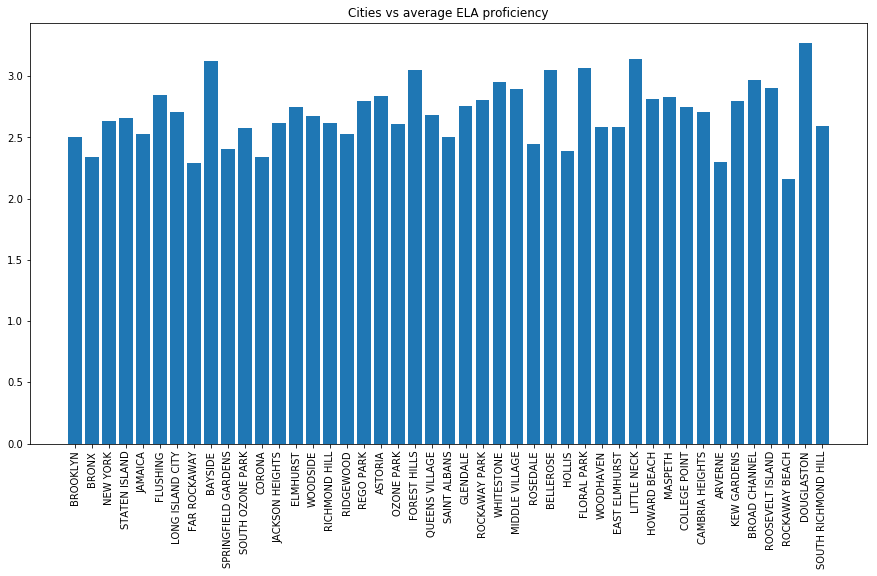

In [37]:
y=[]
city_list = list(df["City"].value_counts().index)
#print(city_list)
for i in city_list:
    y.append(df["Average ELA Proficiency"][df["City"] == i].mean())
dframe=[('City',city_list),('Average ELA Score',y)]
fig = plt.figure(figsize=(15,8))
#ax.set_xlabel('cities')
#ax.set_title('cities vs average ELA proficiency')
plt.title("Cities vs average ELA proficiency")
plt.bar(dframe[0][1],dframe[1][1],width=0.8)
plt.xticks( dframe[0][1], rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

Now we see the relation between the grades and the Economis need Index
Firstly we compare the Average Math Proficiency against economic need index

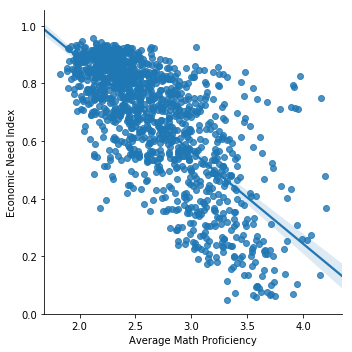

In [38]:
sns.lmplot(x='Average Math Proficiency', y='Economic Need Index', data=df,
           fit_reg=True)


Here we see that an inverse relation seems to exist between them

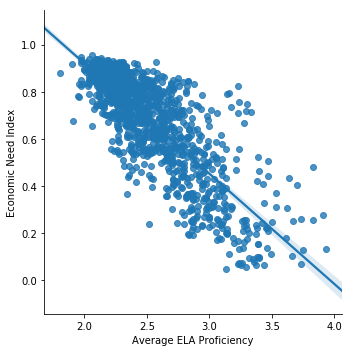

In [39]:
sns.lmplot(x='Average ELA Proficiency', y='Economic Need Index', data=df,
           fit_reg=True) 

Next we compare the Average ELA Proficiency against economic need index
Here also we see that an inverse relation seems to exist between them

K-Means Clustering: School Economic Need and Income Estimate

C:\Users\saiea\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


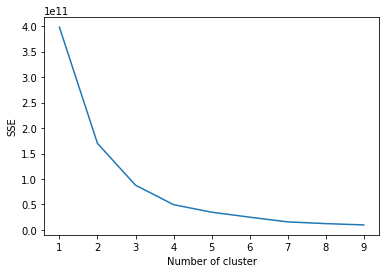

In [40]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_zero = df[df['Economic Need Index'] != 0]
df_zero2 = df_zero[df_zero['School Income Estimate'] != 0]

data = df_zero2[['Economic Need Index', 'School Income Estimate']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

plt.show()

This a plot of Sum of distances of samples to their closest cluster center(SSE)ERROR to the number of clusters considered.
Here we consider the x co-oridinate where there is a change in slope of the error ,to be the ideal k (or number of classes) that should be considered for clustering .Here we can see that its 3(k=3)

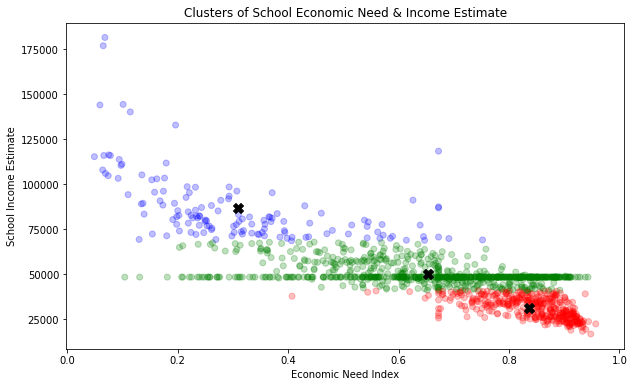

In [41]:
# Import KMeans model from sklearn library
from sklearn.cluster import KMeans

# Graph and create 3 clusters 
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df_zero2[["Economic Need Index","School Income Estimate"]])
# here  c represents the three clusters 0,1,2]
kmeans_colors = ['green' if c == 0 else 'red' if c == 2 else 'yellow' if c == 3 else 'blue' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Economic Need Index",y="School Income Estimate", data=df_zero2,
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Economic Need Index")
plt.ylabel("School Income Estimate")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of School Economic Need & Income Estimate")
plt.show()

We can see three clusters here:
1:the red represents the schools greater economic need but lower income(hence are very much in need of Income)

2:the green represents the schools with moderate economic need and moderate Income estimate(hence are in moderate need of Income) 

3:The blue represents the schools with low economic need ,but have surplus income.Hence are in no need of any inremented income 

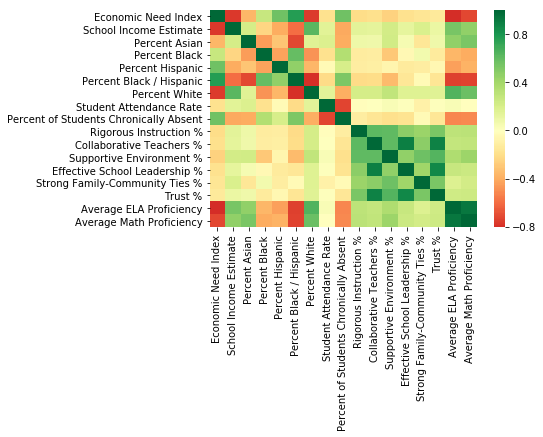

In [51]:
df2 = df.iloc[:,[16,17,19,20,21,22,23,24,25,26,28,30,32,34,36,39,40]]
#Correlation Matrix
corr = df2.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="RdYlGn", center=0)